In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def percent2float(data):
    output = []
    for x in data:
        output.append(float(x.strip('%'))/100)
        
    return output

def str2int(data):
    output = []
    for x in data:
        output.append(int(x))
        
    return output

def money2int(data):
    output = []
    for x in data:
        output.append(int(x.strip('$').replace(',', '')))
        
    return output

def qhp_process(dat):
    
    data = dat.copy()
    
    #dealing with nans and duplicates
    data['Adult Dental '] = data['Adult Dental '].fillna(0)
    data['Child Dental '] = data['Adult Dental '].fillna(0)
    data = data.replace('X', 1)
    
    data = data.drop(['Premium Scenarios', 'Standard Plan Cost Sharing', '73 Percent Actuarial Value Silver Plan Cost Sharing', '87 Percent Actuarial Value Silver Plan Cost Sharing', '94 Percent Actuarial Value Silver Plan Cost Sharing'], axis = 1)

    data_columns = ['State Code', 'Metal Level', 'Issuer Name', 'Plan ID (Standard Component)', 'Plan Type', 'Child Only Offering', 'Adult Dental ', 'Child Dental ', 'EHB Percent of Total Premium']
    data = data[data_columns]
    data = data.dropna()
    data.columns = ['state', 'metal', 'issuer', 'plan_id', 'plan_type', 'child_only_offering', 'adult_dental', 'child_dental', 'EHB_over_premium']

    data = data.drop_duplicates()
    data['EHB_over_premium'] = percent2float(data['EHB_over_premium'])
        
    
    return data
    
def qual_process(dat):
    
    data = dat.copy()
    
    #dealing with nans and duplicates
    data = data[['PlanID', 'OverallRatingValue', 'MedicalCareRatingValue', 'MemberExperienceRatingValue', 'PlanAdministrationRatingValue']]
    data = data.replace('NR', np.nan)
    data = data.dropna()
    data.columns = ['PlanID', 'overall_rating', 'medcare_rating', 'member_exp_rating', 'plan_admin_rating']
    quality_metrics = ['overall_rating', 'medcare_rating', 'member_exp_rating', 'plan_admin_rating']
    for qual in quality_metrics:
        data[qual] = str2int(data[qual])
    return data

In [3]:
#data
qhp_19 = pd.read_excel('data\individual_qhp19.xlsx', sheet_name='Individual_Market_Medical')
qhp_20 = pd.read_excel('data\individual_qhp20.xlsx', sheet_name='Individual_Market_Medical')
qhp_21 = pd.read_excel('data\individual_qhp21.xlsx', sheet_name='Individual_Market_Medical')
qhp_22 = pd.read_excel('data\individual_qhp22.xlsx', sheet_name='Individual_Market_Medical')

qual_20 = pd.read_csv('data\quality20.csv') 
qual_21 = pd.read_csv('data\quality21.csv') 
qual_22 = pd.read_csv('data\quality22.csv') 
qual_23 = pd.read_csv('data\quality23.csv') 

In [4]:
qhp19 = qhp_process(qhp_19)
qhp20 = qhp_process(qhp_20)
qhp21 = qhp_process(qhp_21)
qhp22 = qhp_process(qhp_22)


qual19 = qual_process(qual_20)
qual20 = qual_process(qual_21)
qual21 = qual_process(qual_22)
qual22 = qual_process(qual_23)

In [5]:
#merge years
merged19 = qhp19.merge(qual19, how = 'left', left_on='plan_id', right_on='PlanID')
merged19["Year"] = 2019
merged20 = qhp20.merge(qual20, how = 'left', left_on='plan_id', right_on='PlanID')
merged20["Year"] = 2020
merged21 = qhp21.merge(qual21, how = 'left', left_on='plan_id', right_on='PlanID')
merged21["Year"] = 2021
merged22 = qhp22.merge(qual22, how = 'left', left_on='plan_id', right_on='PlanID')
merged22["Year"] = 2022


In [6]:
data = pd.concat([merged19, merged20, merged21, merged22])

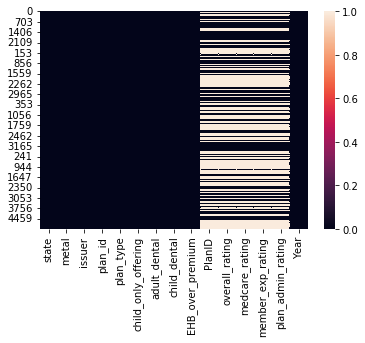

In [7]:
sns.heatmap(data.isnull())

In [8]:
data

,state,metal,issuer,plan_id,plan_type,child_only_offering,adult_dental,child_dental,EHB_over_premium,PlanID,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating,Year
0,OR,Catastrophic,PacificSource Health Plans,10091OR0680001,PPO,Allows Adult and Child-Only,0,0,0.9999,10091OR0680001,3.0,3.0,3.0,4.0,2019
1,OR,Bronze,PacificSource Health Plans,10091OR0680002,PPO,Allows Adult and Child-Only,0,0,0.9999,10091OR0680002,3.0,3.0,3.0,4.0,2019
2,OR,Silver,PacificSource Health Plans,10091OR0680003,PPO,Allows Adult and Child-Only,0,0,0.9999,10091OR0680003,3.0,3.0,3.0,4.0,2019
3,OR,Gold,PacificSource Health Plans,10091OR0680004,PPO,Allows Adult and Child-Only,0,0,0.9999,10091OR0680004,3.0,3.0,3.0,4.0,2019
4,OR,Catastrophic,PacificSource Health Plans,10091OR0680005,PPO,Allows Adult and Child-Only,0,0,0.9999,10091OR0680005,3.0,3.0,3.0,4.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,WY,Expanded Bronze,Mountain Health CO-OP,38576WY0020003,PPO,Allows Adult and Child-Only,0,0,1.0000,NaN,NaN,NaN,NaN,NaN,2022
5147,WY,Expanded Bronze,Mountain Health CO-OP,38576WY0020004,PPO,Allows Adult and Child-Only,0,0,1.0000,NaN,NaN,NaN,NaN,NaN,2022
5148,WY,Gold,Mountain Health CO-OP,38576WY0020005,PPO,Allows Adult and Child-Only,0,0,1.0000,NaN,NaN,NaN,NaN,NaN,2022
5149,WY,Silver,Mountain Health CO-OP,38576WY0020006,PPO,Allows Adult and Child-Only,0,0,1.0000,NaN,NaN,NaN,NaN,NaN,2022


In [9]:
set(data['issuer'])

{'Absolute Total Care, Inc',
 'Aetna CVS Health',
 'Aetna Life Insurance Company',
 'Alliant Health Plans',
 'Ambetter From Illinicare Health',
 'Ambetter from Absolute Total Care',
 'Ambetter from Arizona Complete Health',
 'Ambetter from Arkansas Health & Wellness',
 'Ambetter from Buckeye Health',
 'Ambetter from Buckeye Health Plan',
 'Ambetter from Home State Health',
 'Ambetter from Louisiana Healthcare Connections',
 'Ambetter from MHS',
 'Ambetter from Magnolia Health',
 'Ambetter from Meridian',
 'Ambetter from NH Healthy Families',
 'Ambetter from Nebraska Total Care',
 'Ambetter from New Hampshire Healthy Families',
 'Ambetter from PA Health & Wellness',
 'Ambetter from Peach State Health Plan',
 'Ambetter from Sunflower Health Plan',
 'Ambetter from Sunshine Health',
 'Ambetter from Superior HealthPlan',
 'Ambetter from Western Sky Community Care',
 'Ambetter of Illinois',
 'Ambetter of Magnolia Inc.',
 'Ambetter of North Carolina',
 'Ambetter of North Carolina Inc.',
 'Amb

In [10]:
#look at data by states

state = pd.concat([merged19.groupby(['state']).mean(), merged20.groupby(['state']).mean(), merged21.groupby(['state']).mean(), merged22.groupby(['state']).mean()])
state

,adult_dental,child_dental,EHB_over_premium,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating,Year
state,,,,,,,,
AK,0.000000,0.000000,0.980400,3.000000,3.000000,3.000000,3.000000,2019.0
AL,0.000000,0.000000,1.000000,3.000000,3.000000,4.000000,3.000000,2019.0
AR,0.000000,0.000000,0.993148,3.461538,2.000000,5.000000,4.000000,2019.0
AZ,0.000000,0.000000,0.999260,2.120000,2.120000,1.120000,3.000000,2019.0
DE,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2019.0
...,...,...,...,...,...,...,...,...
UT,0.000000,0.000000,0.996326,3.764706,3.764706,2.882353,4.000000,2022.0
VA,0.006410,0.006410,0.997103,4.000000,4.000000,2.395833,3.729167,2022.0
WI,0.096774,0.096774,0.992693,3.979695,3.979695,3.213198,4.182741,2022.0


In [42]:
set(data['state'])

{'AK',
 'AL',
 'AR',
 'AZ',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'ME',
 'MI',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'OH',
 'OK',
 'OR',
 'PA',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'WI',
 'WV',
 'WY'}

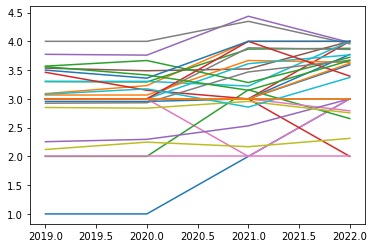

In [11]:
stats = []
avg_rating = []
change = []

for stat in set(state.index):
    
    state_df = state[state.index == stat]
    if len(state_df) != 4:
        continue
    stats.append(stat)
    avg_rating.append(np.mean(state_df['overall_rating']))
    diff = state_df[state_df['Year'] == 2022.0]['overall_rating'][0] - state_df[state_df['Year'] == 2019.0]['overall_rating'][0]
    change.append(diff)
    plt.plot(state_df['Year'], state_df['overall_rating'])

In [12]:
d = {'avg_rating': avg_rating, 'change': change}
state_trends = pd.DataFrame(data=d, index=stats)
state_trends.idxmax()

avg_rating    SD
change        WV
dtype: object

In [13]:
state_trends.sort_values(by = 'avg_rating', ascending = False)[0:5]

,avg_rating,change
SD,4.076087,-0.043478
WI,3.987542,0.205502
OR,3.715000,0.500000
VA,3.636022,0.465116
LA,3.584258,0.578049


In [14]:
state_trends.sort_values(by = 'avg_rating', ascending = True)[0:5]

,avg_rating,change
WV,1.750000,2.000000
WY,2.000000,0.000000
AZ,2.212166,0.192925
MO,2.453348,0.657143
MT,2.520557,0.744681


In [15]:
state_trends.sort_values(by = 'change', ascending = False)[0:5]

,avg_rating,change
WV,1.750000,2.000000
AL,3.250000,1.000000
NH,3.580420,0.909091
NC,3.436563,0.859155
IL,3.170534,0.815676


In [16]:
state_trends.sort_values(by = 'change', ascending = True)[0:5]

,avg_rating,change
AR,2.902885,-1.461538
MS,2.947917,-0.208333
TX,2.850265,-0.093686
SD,4.076087,-0.043478
WY,2.000000,0.000000


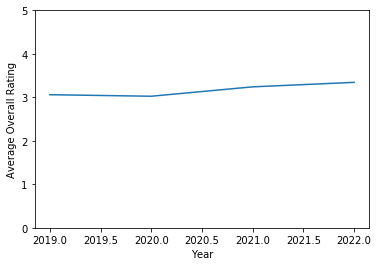

In [37]:
avg = data.groupby(by = ['Year']).mean()
plt.plot(avg.index, avg['overall_rating'])
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.ylim(0, 5);

In [38]:
avg

,adult_dental,child_dental,EHB_over_premium,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating
Year,,,,,,,
2019,0.031591,0.031591,0.997404,3.060468,2.606389,3.023388,3.180833
2020,0.065762,0.065762,0.996147,3.025309,2.620365,3.034138,3.190700
2021,0.079956,0.079956,0.995652,3.241285,2.907407,3.486928,3.342593
2022,0.092798,0.092798,0.995120,3.344500,3.128112,2.952014,3.603893


In [17]:
# look at insurers
insurer = data.groupby(by = ['state', 'issuer']).mean()
insurer = insurer.dropna()
insurer

adult_dental  child_dental  \
state issuer                                                                 
AK    Premera Blue Cross Blue Shield of Alaska      0.000000      0.000000   
AL    Blue Cross and Blue Shield of Alabama         0.000000      0.000000   
      Bright Health                                 0.000000      0.000000   
AR    Ambetter from Arkansas Health & Wellness      0.416667      0.416667   
      Arkansas Blue Cross and Blue Shield           0.000000      0.000000   
...                                                      ...           ...   
WI    Together with CCHP                            0.000000      0.000000   
      Unity Health Plans Insurance Corporation      0.368421      0.368421   
WV    CareSource                                    0.454545      0.454545   
      CareSource West Virginia Co.                  0.454545      0.454545   
WY    Blue Cross Blue Shield of Wyoming             0.000000      0.000000   

                                                EHB_over_premium  \
state issuer                                                       
AK    Premera Blue Cross Blue Shield of Alaska          0.988536   
AL    Blue Cross and Blue Shield of Alabama             1.000000   
      Bright Health                                     1.000000   
AR    Ambetter from Arkansas Health & Wellness          0.981597   
      Arkansas Blue Cross and Blue Shield               0.996039   
...                                                          ...   
WI    Together with CCHP                                1.000000   
      Unity Health Plans Insurance Corporation          0.982274   
WV    CareSource                                        0.988803   
      CareSource West Virginia Co.                      0.984527   
WY    Blue Cross Blue Shield of Wyoming                 1.000000   

                                                overall_rating  \
state issuer                                                     
AK    Premera Blue Cross Blue Shield of Alaska        2.761905   
AL    Blue Cross and Blue Shield of Alabama           3.250000   
      Bright Health                                   3.000000   
AR    Ambetter from Arkansas Health & Wellness        2.536585   
      Arkansas Blue Cross and Blue Shield             2.913043   
...                                                        ...   
WI    Together with CCHP                              4.000000   
      Unity Health Plans Insurance Corporation        4.000000   
WV    CareSource                                      2.000000   
      CareSource West Virginia Co.                    1.000000   
WY    Blue Cross Blue Shield of Wyoming               2.000000   

                                                medcare_rating  \
state issuer                                                     
AK    Premera Blue Cross Blue Shield of Alaska        3.000000   
AL    Blue Cross and Blue Shield of Alabama           3.250000   
      Bright Health                                   2.000000   
AR    Ambetter from Arkansas Health & Wellness        2.000000   
      Arkansas Blue Cross and Blue Shield             2.000000   
...                                                        ...   
WI    Together with CCHP                              3.363636   
      Unity Health Plans Insurance Corporation        3.000000   
WV    CareSource                                      1.666667   
      CareSource West Virginia Co.                    1.000000   
WY    Blue Cross Blue Shield of Wyoming               1.304348   

                                                member_exp_rating  \
state issuer                                                        
AK    Premera Blue Cross Blue Shield of Alaska           2.761905   
AL    Blue Cross and Blue Shield of Alabama              4.000000   
      Bright Health                                      3.000000   
AR    Ambetter from Arkansas Health & Wellness           4.536585   
      Arkansas B

In [18]:
result = insurer.loc[(insurer.index.get_level_values('state') == 'AK') & (insurer.index.get_level_values('issuer') == 'Premera Blue Cross Blue Shield of Alaska')]
result

,,adult_dental,child_dental,EHB_over_premium,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating,Year
state,issuer,,,,,,,,
AK,Premera Blue Cross Blue Shield of Alaska,0.0,0.0,0.988536,2.761905,3.0,2.761905,3.285714,2020.636364


In [19]:
insurer.sort_values(by = 'overall_rating', ascending = False)[0:5]

adult_dental  \
state issuer                                                             
VA    Kaiser Permanente                                       0.272727   
      Kaiser Foundation Health Plan of the Mid-Atlant...      1.000000   
GA    Kaiser Permanente                                       0.000000   
WI    Network Health                                          0.000000   
      Group Health Cooperative-SCW                            0.000000   

                                                          child_dental  \
state issuer                                                             
VA    Kaiser Permanente                                       0.272727   
      Kaiser Foundation Health Plan of the Mid-Atlant...      1.000000   
GA    Kaiser Permanente                                       0.000000   
WI    Network Health                                          0.000000   
      Group Health Cooperative-SCW                            0.000000   

                                                          EHB_over_premium  \
state issuer                                                                 
VA    Kaiser Permanente                                           0.989145   
      Kaiser Foundation Health Plan of the Mid-Atlant...          0.986000   
GA    Kaiser Permanente                                           0.997741   
WI    Network Health                                              0.990835   
      Group Health Cooperative-SCW                                0.993350   

                                                          overall_rating  \
state issuer                                                               
VA    Kaiser Permanente                                         5.000000   
      Kaiser Foundation Health Plan of the Mid-Atlant...        5.000000   
GA    Kaiser Permanente                                         4.703704   
WI    Network Health                                            4.363636   
      Group Health Cooperative-SCW                              4.321429   

                                                          medcare_rating  \
state issuer                                                               
VA    Kaiser Permanente                                         5.000000   
      Kaiser Foundation Health Plan of the Mid-Atlant...        5.000000   
GA    Kaiser Permanente                                         4.370370   
WI    Network Health                                            4.000000   
      Group Health Cooperative-SCW                              3.678571   

                                                          member_exp_rating  \
state issuer                                                                  
VA    Kaiser Permanente                                            3.354839   
      Kaiser Foundation Health Plan of the Mid-Atlant...           3.000000   
GA    Kaiser Permanente                                            3.000000   
WI    Network Health                                               4.363636   
      Group Health Cooperative-SCW                                 4.321429   

                                                          plan_admin_rating  \
state issuer                                                                  
VA    Kaiser Permanente                                            4.580645   
      Kaiser Foundation Health Plan of the Mid-Atlant...           5.000000   
GA    Kaiser Permanente                                            4.629630   
WI    Network Health                                               5.000000   
      Group Health Cooperative-SCW                                 4.642857   

                                                                 Year  
state issuer                                                           
VA    Kaiser Permanente                                   2021.121212  
      Kaiser Foundation Health Plan of the Mid-Atlant...  2019.000000  
GA    Kaise

In [20]:
insurer.sort_values(by = 'overall_rating', ascending = True)[0:5]

adult_dental  child_dental  \
state issuer                                                                 
WV    CareSource West Virginia Co.                  0.454545      0.454545   
WY    Blue Cross Blue Shield of Wyoming             0.000000      0.000000   
NM    Blue Cross and Blue Shield of New Mexico      0.000000      0.000000   
      Blue Cross Blue Shield of New Mexico          0.000000      0.000000   
FL    Molina Healthcare                             0.000000      0.000000   

                                                EHB_over_premium  \
state issuer                                                       
WV    CareSource West Virginia Co.                      0.984527   
WY    Blue Cross Blue Shield of Wyoming                 1.000000   
NM    Blue Cross and Blue Shield of New Mexico          1.000000   
      Blue Cross Blue Shield of New Mexico              1.000000   
FL    Molina Healthcare                                 0.997469   

                                                overall_rating  \
state issuer                                                     
WV    CareSource West Virginia Co.                         1.0   
WY    Blue Cross Blue Shield of Wyoming                    2.0   
NM    Blue Cross and Blue Shield of New Mexico             2.0   
      Blue Cross Blue Shield of New Mexico                 2.0   
FL    Molina Healthcare                                    2.0   

                                                medcare_rating  \
state issuer                                                     
WV    CareSource West Virginia Co.                    1.000000   
WY    Blue Cross Blue Shield of Wyoming               1.304348   
NM    Blue Cross and Blue Shield of New Mexico        2.000000   
      Blue Cross Blue Shield of New Mexico            2.000000   
FL    Molina Healthcare                               2.000000   

                                                member_exp_rating  \
state issuer                                                        
WV    CareSource West Virginia Co.                       3.000000   
WY    Blue Cross Blue Shield of Wyoming                  2.695652   
NM    Blue Cross and Blue Shield of New Mexico           1.000000   
      Blue Cross Blue Shield of New Mexico               1.000000   
FL    Molina Healthcare                                  2.000000   

                                                plan_admin_rating         Year  
state issuer                                                                    
WV    CareSource West Virginia Co.                       2.000000  2019.000000  
WY    Blue Cross Blue Shield of Wyoming                  2.869565  2020.652174  
NM    Blue Cross and Blue Shield of New Mexico           1.000000  2020.500000  
      Blue Cross Blue Shield of New Mexico               1.000000  2019.000000  
FL    Molina Healthcare                                  3.000000  2021.068966

In [21]:
#group by year
grouped = data.groupby(by = ['Year', 'state', 'issuer']).mean()
grouped = grouped.dropna()
grouped

adult_dental  \
Year state issuer                                                      
2019 AK    Premera Blue Cross Blue Shield of Alaska         0.000000   
     AL    Blue Cross and Blue Shield of Alabama            0.000000   
     AR    Celtic Insurance Company                         0.000000   
           USAble Mutual Insurance Company                  0.000000   
     AZ    Blue Cross and Blue Shield of Arizona, Inc.      0.000000   
...                                                              ...   
2022 WI    Quartz                                           0.409091   
           Security Health Plan                             0.000000   
           Together with CCHP                               0.000000   
     WV    CareSource                                       0.454545   
     WY    Blue Cross Blue Shield of Wyoming                0.000000   

                                                        child_dental  \
Year state issuer                                                      
2019 AK    Premera Blue Cross Blue Shield of Alaska         0.000000   
     AL    Blue Cross and Blue Shield of Alabama            0.000000   
     AR    Celtic Insurance Company                         0.000000   
           USAble Mutual Insurance Company                  0.000000   
     AZ    Blue Cross and Blue Shield of Arizona, Inc.      0.000000   
...                                                              ...   
2022 WI    Quartz                                           0.409091   
           Security Health Plan                             0.000000   
           Together with CCHP                               0.000000   
     WV    CareSource                                       0.454545   
     WY    Blue Cross Blue Shield of Wyoming                0.000000   

                                                        EHB_over_premium  \
Year state issuer                                                          
2019 AK    Premera Blue Cross Blue Shield of Alaska             0.980400   
     AL    Blue Cross and Blue Shield of Alabama                1.000000   
     AR    Celtic Insurance Company                             0.982550   
           USAble Mutual Insurance Company                      0.996478   
     AZ    Blue Cross and Blue Shield of Arizona, Inc.          1.000000   
...                                                                  ...   
2022 WI    Quartz                                               0.982818   
           Security Health Plan                                 1.000000   
           Together with CCHP                                   1.000000   
     WV    CareSource                                           0.994918   
     WY    Blue Cross Blue Shield of Wyoming                    1.000000   

                                                        overall_rating  \
Year state issuer                                                        
2019 AK    Premera Blue Cross Blue Shield of Alaska                3.0   
     AL    Blue Cross and Blue Shield of Alabama                   3.0   
     AR    Celtic Insurance Company                                3.0   
           USAble Mutual Insurance Company                         4.0   
     AZ    Blue Cross and Blue Shield of Arizona, Inc.             2.0   
...                                                                ...   
2022 WI    Quartz                                                  4.0   
           Security Health Plan                                    4.0   
           Together with CCHP                                      4.0   
     WV    CareSource                                              3.0   
     WY    Blue Cross Blue Shield of Wyoming                       2.0   

                                                        medcare_rating  \
Year state issuer                                                        
2019 AK    Premera Blue Cross Blue Shield of Alaska                3.0   
     AL 

In [22]:
#best insurers aggregated at state level 2019
grouped.loc[(grouped.index.get_level_values('Year') == 2019)].sort_values('overall_rating', ascending = False)

adult_dental  \
Year state issuer                                                             
2019 VA    Kaiser Foundation Health Plan of the Mid-Atlant...      1.000000   
     TX    SHA, LLC DBA FirstCare Health Plans                     0.000000   
     LA    Louisiana Health Service & Indemnity Company            0.000000   
     WI    HealthPartners Insurance Company                        0.000000   
     OR    Kaiser Foundation Healthplan of the NW                  0.000000   
...                                                                     ...   
     OH    Paramount Insurance Company                             0.000000   
     TX    CHRISTUS Health Plan                                    0.000000   
           Community Health Choice, Inc.                           0.000000   
     WY    Blue Cross Blue Shield of Wyoming                       0.000000   
     WV    CareSource West Virginia Co.                            0.454545   

                                                               child_dental  \
Year state issuer                                                             
2019 VA    Kaiser Foundation Health Plan of the Mid-Atlant...      1.000000   
     TX    SHA, LLC DBA FirstCare Health Plans                     0.000000   
     LA    Louisiana Health Service & Indemnity Company            0.000000   
     WI    HealthPartners Insurance Company                        0.000000   
     OR    Kaiser Foundation Healthplan of the NW                  0.000000   
...                                                                     ...   
     OH    Paramount Insurance Company                             0.000000   
     TX    CHRISTUS Health Plan                                    0.000000   
           Community Health Choice, Inc.                           0.000000   
     WY    Blue Cross Blue Shield of Wyoming                       0.000000   
     WV    CareSource West Virginia Co.                            0.454545   

                                                               EHB_over_premium  \
Year state issuer                                                                 
2019 VA    Kaiser Foundation Health Plan of the Mid-Atlant...          0.986000   
     TX    SHA, LLC DBA FirstCare Health Plans                         0.996917   
     LA    Louisiana Health Service & Indemnity Company                1.000000   
     WI    HealthPartners Insurance Company                            1.000000   
     OR    Kaiser Foundation Healthplan of the NW                      0.994850   
...                                                                         ...   
     OH    Paramount Insurance Company                                 0.998000   
     TX    CHRISTUS Health Plan                                        1.000000   
           Community Health Choice, Inc.                               1.000000   
     WY    Blue Cross Blue Shield of Wyoming                           1.000000   
     WV    CareSource West Virginia Co.                                0.984527   

                                                               overall_rating  \
Year state issuer                                                               
2019 VA    Kaiser Foundation Health Plan of the Mid-Atlant...             5.0   
     TX    SHA, LLC DBA FirstCare Health Plans                            4.0   
     LA    Louisiana Health Service & Indemnity Company                   4.0   
     WI    HealthPartners Insurance Company                               4.0   
     OR    Kaiser Foundation Healthplan of the NW                         4.0   
...                                                                       ...   
     OH    Paramount Insurance Company                                    2.0   
     TX    CHRISTUS Health Plan                                           2.0   
           Community Health Choice, Inc.                                  2.0   
     WY    Blue Cross Blue Shield of

In [23]:
data[data['issuer'] == 'Kaiser Foundation Health Plan of the Mid-Atlantic States, Inc.']

,state,metal,issuer,plan_id,plan_type,child_only_offering,adult_dental,child_dental,EHB_over_premium,PlanID,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating,Year
2482,VA,Gold,Kaiser Foundation Health Plan of the Mid-Atlan...,95185VA0530001,HMO,Allows Adult and Child-Only,1,1,0.986,95185VA0530001,5.0,5.0,3.0,5.0,2019
2483,VA,Gold,Kaiser Foundation Health Plan of the Mid-Atlan...,95185VA0530002,HMO,Allows Adult and Child-Only,1,1,0.986,95185VA0530002,5.0,5.0,3.0,5.0,2019
2484,VA,Silver,Kaiser Foundation Health Plan of the Mid-Atlan...,95185VA0530004,HMO,Allows Adult and Child-Only,1,1,0.986,95185VA0530004,5.0,5.0,3.0,5.0,2019
2485,VA,Silver,Kaiser Foundation Health Plan of the Mid-Atlan...,95185VA0530005,HMO,Allows Adult and Child-Only,1,1,0.986,95185VA0530005,5.0,5.0,3.0,5.0,2019
2486,VA,Expanded Bronze,Kaiser Foundation Health Plan of the Mid-Atlan...,95185VA0530006,HMO,Allows Adult and Child-Only,1,1,0.986,95185VA0530006,5.0,5.0,3.0,5.0,2019
2487,VA,Catastrophic,Kaiser Foundation Health Plan of the Mid-Atlan...,95185VA0530009,HMO,Allows Adult and Child-Only,1,1,0.986,95185VA0530009,5.0,5.0,3.0,5.0,2019
2488,VA,Platinum,Kaiser Foundation Health Plan of the Mid-Atlan...,95185VA0530010,HMO,Allows Adult and Child-Only,1,1,0.986,95185VA0530010,5.0,5.0,3.0,5.0,2019
2489,VA,Silver,Kaiser Foundation Health Plan of the Mid-Atlan...,95185VA0530013,HMO,Allows Adult and Child-Only,1,1,0.986,95185VA0530013,5.0,5.0,3.0,5.0,2019
2490,VA,Gold,Kaiser Foundation Health Plan of the Mid-Atlan...,95185VA0530014,HMO,Allows Adult and Child-Only,1,1,0.986,95185VA0530014,5.0,5.0,3.0,5.0,2019


In [24]:
# best insurers aggregated at state level 2020
grouped.loc[(grouped.index.get_level_values('Year') == 2020)].sort_values('overall_rating', ascending = False)

adult_dental  child_dental  \
Year state issuer                                                          
2020 VA    Kaiser Permanente                      1.000000      1.000000   
     MI    Physicians Health Plan                 0.000000      0.000000   
     SD    Sanford Health Plan                    0.000000      0.000000   
     WI    HealthPartners                         0.000000      0.000000   
     ND    Sanford Health Plan                    0.000000      0.000000   
...                                                    ...           ...   
     AZ    Blue Cross Blue Shield of Arizona      0.000000      0.000000   
     AR    QCA Health Plan                        0.000000      0.000000   
           QC Life and Health                     0.000000      0.000000   
     WY    Blue Cross Blue Shield of Wyoming      0.000000      0.000000   
     WV    CareSource                             0.454545      0.454545   

                                              EHB_over_premium  \
Year state issuer                                                
2020 VA    Kaiser Permanente                          0.985700   
     MI    Physicians Health Plan                     1.000000   
     SD    Sanford Health Plan                        1.000000   
     WI    HealthPartners                             1.000000   
     ND    Sanford Health Plan                        1.000000   
...                                                        ...   
     AZ    Blue Cross Blue Shield of Arizona          0.999300   
     AR    QCA Health Plan                            1.000000   
           QC Life and Health                         1.000000   
     WY    Blue Cross Blue Shield of Wyoming          1.000000   
     WV    CareSource                                 0.985264   

                                              overall_rating  medcare_rating  \
Year state issuer                                                              
2020 VA    Kaiser Permanente                             5.0             5.0   
     MI    Physicians Health Plan                        4.0             3.0   
     SD    Sanford Health Plan                           4.0             3.5   
     WI    HealthPartners                                4.0             3.0   
     ND    Sanford Health Plan                           4.0             4.0   
...                                                      ...             ...   
     AZ    Blue Cross Blue Shield of Arizona             2.0             2.0   
     AR    QCA Health Plan                               2.0             1.0   
           QC Life and Health                            2.0             1.0   
     WY    Blue Cross Blue Shield of Wyoming             2.0             1.0   
     WV    CareSource                                    1.0             1.0   

                                              member_exp_rating  \
Year state issuer                                                 
2020 VA    Kaiser Permanente                                3.0   
     MI    Physicians Health Plan                           3.0   
     SD    Sanford Health Plan                              4.0   
     WI    HealthPartners                                   4.0   
     ND    Sanford Health Plan                              3.0   
...                                                         ...   
     AZ    Blue Cross Blue Shield of Arizona                1.0   
     AR    QCA Health Plan                                  5.0   
           QC Life and Health                               5.0   
     WY    Blue Cross Blue Shield of Wyoming                3.0   
     WV    CareSource                                       3.0   

                                              plan_admin_rating  
Year state issuer                                                
2020 VA    Kaiser Permanente                                5.0  
     MI    Physicians Health Plan                           5.0  
     SD    Sanford He

In [25]:
data[data['issuer'] == 'Kaiser Permanente']

,state,metal,issuer,plan_id,plan_type,child_only_offering,adult_dental,child_dental,EHB_over_premium,PlanID,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating,Year
507,GA,Gold,Kaiser Permanente,89942GA0050002,HMO,Allows Adult and Child-Only,0,0,0.9980,89942GA0050002,4.0,4.0,3.0,5.0,2020
508,GA,Silver,Kaiser Permanente,89942GA0050005,HMO,Allows Adult and Child-Only,0,0,0.9980,89942GA0050005,4.0,4.0,3.0,5.0,2020
509,GA,Silver,Kaiser Permanente,89942GA0050006,HMO,Allows Adult and Child-Only,0,0,0.9980,89942GA0050006,4.0,4.0,3.0,5.0,2020
510,GA,Expanded Bronze,Kaiser Permanente,89942GA0050007,HMO,Allows Adult and Child-Only,0,0,0.9980,89942GA0050007,4.0,4.0,3.0,5.0,2020
511,GA,Expanded Bronze,Kaiser Permanente,89942GA0050009,HMO,Allows Adult and Child-Only,0,0,0.9980,89942GA0050009,4.0,4.0,3.0,5.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,VA,Silver,Kaiser Permanente,95185VA0530016,HMO,Allows Adult and Child-Only,0,0,0.9914,95185VA0530016,5.0,5.0,3.0,4.0,2022
4660,VA,Bronze,Kaiser Permanente,95185VA0530017,HMO,Allows Adult and Child-Only,0,0,0.9914,95185VA0530017,5.0,5.0,3.0,4.0,2022
4661,VA,Expanded Bronze,Kaiser Permanente,95185VA0530018,HMO,Allows Adult and Child-Only,0,0,0.9914,95185VA0530018,5.0,5.0,3.0,4.0,2022
4662,VA,Gold,Kaiser Permanente,95185VA0530019,HMO,Allows Adult and Child-Only,0,0,0.9914,95185VA0530019,5.0,5.0,3.0,4.0,2022


In [26]:
# best insurers aggregated at state level 2021
grouped.loc[(grouped.index.get_level_values('Year') == 2021)].sort_values('overall_rating', ascending = False)

adult_dental  \
Year state issuer                                                             
2021 VA    Kaiser Permanente                                       0.000000   
     WI    Group Health Cooperative-SCW                            0.000000   
           Network Health                                          0.000000   
     GA    Kaiser Permanente                                       0.000000   
     WI    Dean Health Plan                                        0.000000   
...                                                                     ...   
     IL    Ambetter of Illinois                                    0.466667   
     HI    HMSA                                                    0.000000   
     GA    Blue Cross Blue Shield Healthcare Plan of Georg...      0.000000   
     AZ    Blue Cross Blue Shield of Arizona                       0.000000   
     WY    Blue Cross Blue Shield of Wyoming                       0.000000   

                                                               child_dental  \
Year state issuer                                                             
2021 VA    Kaiser Permanente                                       0.000000   
     WI    Group Health Cooperative-SCW                            0.000000   
           Network Health                                          0.000000   
     GA    Kaiser Permanente                                       0.000000   
     WI    Dean Health Plan                                        0.000000   
...                                                                     ...   
     IL    Ambetter of Illinois                                    0.466667   
     HI    HMSA                                                    0.000000   
     GA    Blue Cross Blue Shield Healthcare Plan of Georg...      0.000000   
     AZ    Blue Cross Blue Shield of Arizona                       0.000000   
     WY    Blue Cross Blue Shield of Wyoming                       0.000000   

                                                               EHB_over_premium  \
Year state issuer                                                                 
2021 VA    Kaiser Permanente                                           0.989300   
     WI    Group Health Cooperative-SCW                                0.992500   
           Network Health                                              0.994687   
     GA    Kaiser Permanente                                           0.998000   
     WI    Dean Health Plan                                            1.000000   
...                                                                         ...   
     IL    Ambetter of Illinois                                        0.972473   
     HI    HMSA                                                        0.988458   
     GA    Blue Cross Blue Shield Healthcare Plan of Georg...          1.000000   
     AZ    Blue Cross Blue Shield of Arizona                           1.000000   
     WY    Blue Cross Blue Shield of Wyoming                           1.000000   

                                                               overall_rating  \
Year state issuer                                                               
2021 VA    Kaiser Permanente                                         5.000000   
     WI    Group Health Cooperative-SCW                              5.000000   
           Network Health                                            5.000000   
     GA    Kaiser Permanente                                         5.000000   
     WI    Dean Health Plan                                          4.777778   
...                                                                       ...   
     IL    Ambetter of Illinois                                      2.000000   
     HI    HMSA                                                      2.000000   
     GA    Blue Cross Blue Shield Healthcare Plan of Georg...        2.000000   
     AZ    Blue Cross Blue Shield of

In [27]:
# best insurers aggregated at state level 2022
grouped.loc[(grouped.index.get_level_values('Year') == 2022)].sort_values('overall_rating', ascending = False)

adult_dental  \
Year state issuer                                                             
2022 GA    Kaiser Permanente                                       0.000000   
     VA    Kaiser Permanente                                       0.000000   
     SD    Sanford Health Plan                                     0.000000   
     NH    Ambetter from NH Healthy Families                       0.473684   
     MI    Blue Cross Blue Shield of Michigan Mutual Insur...      0.000000   
...                                                                     ...   
     TX    FirstCare Health Plans                                  0.000000   
           CHRISTUS Health Plan                                    0.272727   
     MS    Molina Healthcare                                       0.000000   
     SC    Molina Healthcare                                       0.000000   
     WY    Blue Cross Blue Shield of Wyoming                       0.000000   

                                                               child_dental  \
Year state issuer                                                             
2022 GA    Kaiser Permanente                                       0.000000   
     VA    Kaiser Permanente                                       0.000000   
     SD    Sanford Health Plan                                     0.000000   
     NH    Ambetter from NH Healthy Families                       0.473684   
     MI    Blue Cross Blue Shield of Michigan Mutual Insur...      0.000000   
...                                                                     ...   
     TX    FirstCare Health Plans                                  0.000000   
           CHRISTUS Health Plan                                    0.272727   
     MS    Molina Healthcare                                       0.000000   
     SC    Molina Healthcare                                       0.000000   
     WY    Blue Cross Blue Shield of Wyoming                       0.000000   

                                                               EHB_over_premium  \
Year state issuer                                                                 
2022 GA    Kaiser Permanente                                           0.997300   
     VA    Kaiser Permanente                                           0.991400   
     SD    Sanford Health Plan                                         1.000000   
     NH    Ambetter from NH Healthy Families                           0.964189   
     MI    Blue Cross Blue Shield of Michigan Mutual Insur...          1.000000   
...                                                                         ...   
     TX    FirstCare Health Plans                                      1.000000   
           CHRISTUS Health Plan                                        0.986955   
     MS    Molina Healthcare                                           0.998256   
     SC    Molina Healthcare                                           0.997686   
     WY    Blue Cross Blue Shield of Wyoming                           1.000000   

                                                               overall_rating  \
Year state issuer                                                               
2022 GA    Kaiser Permanente                                              5.0   
     VA    Kaiser Permanente                                              5.0   
     SD    Sanford Health Plan                                            4.5   
     NH    Ambetter from NH Healthy Families                              4.0   
     MI    Blue Cross Blue Shield of Michigan Mutual Insur...             4.0   
...                                                                       ...   
     TX    FirstCare Health Plans                                         2.0   
           CHRISTUS Health Plan                                           2.0   
     MS    Molina Healthcare                                              2.0   
     SC    Molina Healthcare        